<a href="https://colab.research.google.com/github/Mmarlo5/psychic-doodle/blob/main/Problem_Set_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


This project is focused on looking to see if states where the number of abortions is highest resulted in more restrictions on abortion after the reversal of Roe v. Wade.

The first dataset comes from https://www.guttmacher.org/united-states/abortion. This dataset is complex and contains data on abortion by state. 

The second dataset comes from https://lawatlas.org/datasets/abortion-laws This dataset is complex and contains data on abortion by state such as the type of restrictions.

I added another dataset from the CDC - https://www.cdc.gov/mmwr/volumes/71/ss/ss7110a1.htm#T1_down. 

My research question is: Are states that have the highest frequency of abortions also the states that had the strictest restrictions after the reversal of Roe v. Wade.

I hypothesis that the states with the highest number of occurences (abortions) are the same states with the tightest restrictions after the reversal of Roe v. Wade in 2022.

For this project, I used certain variables since they best represented the research question. I used State level data to first look at the number of abortions by state and added additional occurrence level data. Then I collected data on the U.S states that put abortion bans into place after the reversal of Roe v. Wade. My thinking was that states were reacting to abortion in an attempt to stop a large proportion of women from having abortions since the rate increased. What I found was that states with the lowest occurrence of abortions were the states that had abortion bans in place after the reversal of Roe v. Wade.

As the project continutes, I will be adding more data and additional graphs. The new dataset comes from pew research and contains data on the changes in opinions of abortion by year. https://news.gallup.com/poll/1576/abortion.aspx

#Need to add more variables to two of the graphs (Abortion graphs)
#Want to make a interactive graph if time permits 
#Add all other code from previous problemsets before submitting.

In [2]:
import time, os, sys, re 
import zipfile, json, datetime, string    
import numpy as np
from statistics import *

import matplotlib.pyplot as plt

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler

import urllib

from google.colab import files

import webbrowser                                                                      
import folium as f                                                                     
from folium.plugins import MarkerCluster, HeatMap                                      


! pip install geopandas 
import geopandas as gpd  

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 46.0 MB/s eta 0:00:00


**Data Management**

In [3]:
abortionCen = pd.read_csv("https://raw.githubusercontent.com/Mmarlo5/psychic-doodle/main/Rate%20of%20US%20abortions-Table%201.csv")
abortionCen.head()

,Unnamed: 0,Abortion rate among women aged 15–44,Unnamed: 2,Unnamed: 3,% change in abortion rate,Unnamed: 5,Unnamed: 6
0,NaN,2017.0,2019.0,2020.0,2017–2019,2019–2020,2017–2020
1,United States,13.5,14.2,14.4,5%,1%,7%
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Northeast,20.5,21.8,21.2,7%,-3%,3%
4,Connecticut,17.7,17.9,16.7,1%,-7%,-6%


In [4]:
abortionCen = abortionCen.rename(columns={'Unnamed: 0': 'State', 'Abortion rate among women aged 15–44': 'Abortion rate aged 15-44 (2017)', 'Unnamed: 2': 'Abortion rate among women aged 15-44 (2019)', 'Unnamed: 3': 'Abortion rate among women aged 15-44 (2020)','Unnamed: 5': '% change in abortion rate (2017-2019)','Unnamed: 6': '% change in abortion rate (2019-2020)' })
abortionCen.head()
#Renamed all variables for better understanding


,State,Abortion rate aged 15-44 (2017),Abortion rate among women aged 15-44 (2019),Abortion rate among women aged 15-44 (2020),% change in abortion rate,% change in abortion rate (2017-2019),% change in abortion rate (2019-2020)
0,NaN,2017.0,2019.0,2020.0,2017–2019,2019–2020,2017–2020
1,United States,13.5,14.2,14.4,5%,1%,7%
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Northeast,20.5,21.8,21.2,7%,-3%,3%
4,Connecticut,17.7,17.9,16.7,1%,-7%,-6%


In [5]:
abortionCen.replace(np.nan,"None")
abortionCen.head()
#Everything was replaced correctly

,State,Abortion rate aged 15-44 (2017),Abortion rate among women aged 15-44 (2019),Abortion rate among women aged 15-44 (2020),% change in abortion rate,% change in abortion rate (2017-2019),% change in abortion rate (2019-2020)
0,None,2017.0,2019.0,2020.0,2017–2019,2019–2020,2017–2020
1,United States,13.5,14.2,14.4,5%,1%,7%
2,None,None,None,None,None,None,None
3,Northeast,20.5,21.8,21.2,7%,-3%,3%
4,Connecticut,17.7,17.9,16.7,1%,-7%,-6%
5,Maine,8.8,9.0,10.1,2%,12%,15%
6,Massachusetts,13.5,13.6,12.2,1%,-10%,-9%
7,New Hampshire,9.2,8.5,8.3,-7%,-2%,-9%
8,New Jersey,28.0,28.8,29.2,3%,1%,4%
9,New York,26.3,30.2,28.8,15%,-5%,9%


,State,Abortion rate aged 15-44 (2017),Abortion rate among women aged 15-44 (2019),Abortion rate among women aged 15-44 (2020),% change in abortion rate,% change in abortion rate (2017-2019),% change in abortion rate (2019-2020)
0,NaN,2017.0,2019.0,2020.0,2017–2019,2019–2020,2017–2020
1,United States,13.5,14.2,14.4,5%,1%,7%
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Northeast,20.5,21.8,21.2,7%,-3%,3%
4,Connecticut,17.7,17.9,16.7,1%,-7%,-6%


In [6]:
abortionCen = abortionCen.groupby('State')['Abortion rate among women aged 15-44 (2020)'].sum().reset_index()
abortionCen.head()

,State,Abortion rate among women aged 15-44 (2020)
0,Alabama,6.0
1,Alaska,8.6
2,Arizona,9.3
3,Arkansas,5.6
4,California,19.2


In [7]:
abortionban=pd.read_csv("https://raw.githubusercontent.com/Mmarlo5/psychic-doodle/main/Statistical%20Data-Table%201.csv")
abortionban.head()
#This dataset lists the same country multiple times because of the effective data of the restrictions by state

,State,Effective Date,Valid Through Date,Bans_Prohibit,Limited_Law,Limited_Court,Limited_AG,Prohibit_Req,Bans_gest_Any point in pregnancy,Bans_gest_Fetal heartbeat detected,...,Methods_Prohibit,Methods_ProcedPartial-birth abortions,Methods_ProcedDismemberment abortions,Methods_Proced_Saline method abortions,Methods_ExcLife endangerment,Methods_ExcSerious health risk,Methods_Exc_Fetal anomaly,Methods_Exc_No exceptions,TriggerBan,Bans_PreRoe
0,Alabama,12/1/18,10/28/19,1,1,1,0,1,0,0,...,1,1,1,0,1,1,0,0,0,1
1,Alabama,10/29/19,11/14/19,1,1,1,0,1,0,0,...,1,1,1,0,1,1,0,0,0,1
2,Alabama,11/15/19,6/23/22,1,1,1,0,1,1,0,...,1,1,1,0,1,1,0,0,0,1
3,Alabama,6/24/22,11/1/22,1,1,1,0,1,1,0,...,1,1,1,0,1,1,0,0,0,1
4,Alaska,12/1/18,11/1/22,1,1,1,0,0,.,.,...,1,1,0,0,0,0,0,1,0,0


In [8]:
abortionban.replace(np.nan,"None")

,State,Effective Date,Valid Through Date,Bans_Prohibit,Limited_Law,Limited_Court,Limited_AG,Prohibit_Req,Bans_gest_Any point in pregnancy,Bans_gest_Fetal heartbeat detected,...,Methods_Prohibit,Methods_ProcedPartial-birth abortions,Methods_ProcedDismemberment abortions,Methods_Proced_Saline method abortions,Methods_ExcLife endangerment,Methods_ExcSerious health risk,Methods_Exc_Fetal anomaly,Methods_Exc_No exceptions,TriggerBan,Bans_PreRoe
0,Alabama,12/1/18,10/28/19,1,1,1,0,1,0,0,...,1,1,1,0,1,1,0,0,0,1
1,Alabama,10/29/19,11/14/19,1,1,1,0,1,0,0,...,1,1,1,0,1,1,0,0,0,1
2,Alabama,11/15/19,6/23/22,1,1,1,0,1,1,0,...,1,1,1,0,1,1,0,0,0,1
3,Alabama,6/24/22,11/1/22,1,1,1,0,1,1,0,...,1,1,1,0,1,1,0,0,0,1
4,Alaska,12/1/18,11/1/22,1,1,1,0,0,.,.,...,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,Wyoming,7/1/21,3/14/22,1,0,.,.,1,0,0,...,0,.,.,.,.,.,.,.,0,0
237,Wyoming,3/15/22,7/26/22,1,0,.,.,1,0,0,...,0,.,.,.,.,.,.,.,0,0
238,Wyoming,7/27/22,7/27/22,1,1,1,0,1,1,0,...,0,.,.,.,.,.,.,.,1,0
239,Wyoming,7/28/22,8/9/22,1,1,1,0,1,1,0,...,0,.,.,.,.,.,.,.,1,0


In [9]:
abortionmerge = pd.merge(abortionCen, abortionban, how='outer', on=['State'],indicator=True)
abortionmerge
#Changed None back to NaN - Fix again! 

,State,Abortion rate among women aged 15-44 (2020),Effective Date,Valid Through Date,Bans_Prohibit,Limited_Law,Limited_Court,Limited_AG,Prohibit_Req,Bans_gest_Any point in pregnancy,...,Methods_ProcedPartial-birth abortions,Methods_ProcedDismemberment abortions,Methods_Proced_Saline method abortions,Methods_ExcLife endangerment,Methods_ExcSerious health risk,Methods_Exc_Fetal anomaly,Methods_Exc_No exceptions,TriggerBan,Bans_PreRoe,_merge
0,Alabama,6.0,12/1/18,10/28/19,1.0,1,1,0,1,0,...,1,1,0,1,1,0,0,0,1,both
1,Alabama,6.0,10/29/19,11/14/19,1.0,1,1,0,1,0,...,1,1,0,1,1,0,0,0,1,both
2,Alabama,6.0,11/15/19,6/23/22,1.0,1,1,0,1,1,...,1,1,0,1,1,0,0,0,1,both
3,Alabama,6.0,6/24/22,11/1/22,1.0,1,1,0,1,1,...,1,1,0,1,1,0,0,0,1,both
4,Alaska,8.6,12/1/18,11/1/22,1.0,1,1,0,0,.,...,1,0,0,0,0,0,1,0,0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,Wyoming,0.9,7/1/21,3/14/22,1.0,0,.,.,1,0,...,.,.,.,.,.,.,.,0,0,both
242,Wyoming,0.9,3/15/22,7/26/22,1.0,0,.,.,1,0,...,.,.,.,.,.,.,.,0,0,both
243,Wyoming,0.9,7/27/22,7/27/22,1.0,1,1,0,1,1,...,.,.,.,.,.,.,.,1,0,both
244,Wyoming,0.9,7/28/22,8/9/22,1.0,1,1,0,1,1,...,.,.,.,.,.,.,.,1,0,both


In [10]:
abortionCDC = pd.read_csv("https://raw.githubusercontent.com/Mmarlo5/psychic-doodle/main/CDC_Data%20Abortion.csv")
abortionCDC.head()

,Area,Abortions reported by area of occurrence**,Unnamed: 2,Unnamed: 3,Abortions obtained by out-of-area residents
0,NaN,No.,Rate,Ratio,No. (%)
1,Alabama,"5,713",6.0,99,875 (15.3)
2,Alaska,"1,206",8.4,127,8 (0.7)
3,Arizona,"13,273",9.3,172,72 (0.5)
4,Arkansas,"3,154",5.4,89,390 (12.4)


In [11]:
abortionCDC =abortionCDC.rename(columns = {'Area': 'State'})
abortionCDC.head()

,State,Abortions reported by area of occurrence**,Unnamed: 2,Unnamed: 3,Abortions obtained by out-of-area residents
0,NaN,No.,Rate,Ratio,No. (%)
1,Alabama,"5,713",6.0,99,875 (15.3)
2,Alaska,"1,206",8.4,127,8 (0.7)
3,Arizona,"13,273",9.3,172,72 (0.5)
4,Arkansas,"3,154",5.4,89,390 (12.4)


In [12]:
abortionCDC =abortionCDC.rename(columns = {'Unnamed: 2': 'Number of abortions'})
abortionCDC.head()

,State,Abortions reported by area of occurrence**,Number of abortions,Unnamed: 3,Abortions obtained by out-of-area residents
0,NaN,No.,Rate,Ratio,No. (%)
1,Alabama,"5,713",6.0,99,875 (15.3)
2,Alaska,"1,206",8.4,127,8 (0.7)
3,Arizona,"13,273",9.3,172,72 (0.5)
4,Arkansas,"3,154",5.4,89,390 (12.4)


In [13]:
abortionCDC =abortionCDC.rename(columns = {'Unnamed: 3': 'Rate of abortion'})
abortionCDC.head()
#Data would not be renamed without doing seperate code.

,State,Abortions reported by area of occurrence**,Number of abortions,Rate of abortion,Abortions obtained by out-of-area residents
0,NaN,No.,Rate,Ratio,No. (%)
1,Alabama,"5,713",6.0,99,875 (15.3)
2,Alaska,"1,206",8.4,127,8 (0.7)
3,Arizona,"13,273",9.3,172,72 (0.5)
4,Arkansas,"3,154",5.4,89,390 (12.4)


**Data Visualization Section**
Contains four graphs that seek to better understand my research question.

<BarContainer object of 56 artists>

Text(0.5, 0, 'Abortion rate among women aged 15-44')

Text(0, 0.5, 'State')

Text(0.5, 1.0, 'Abortion Rates by State - 2020')

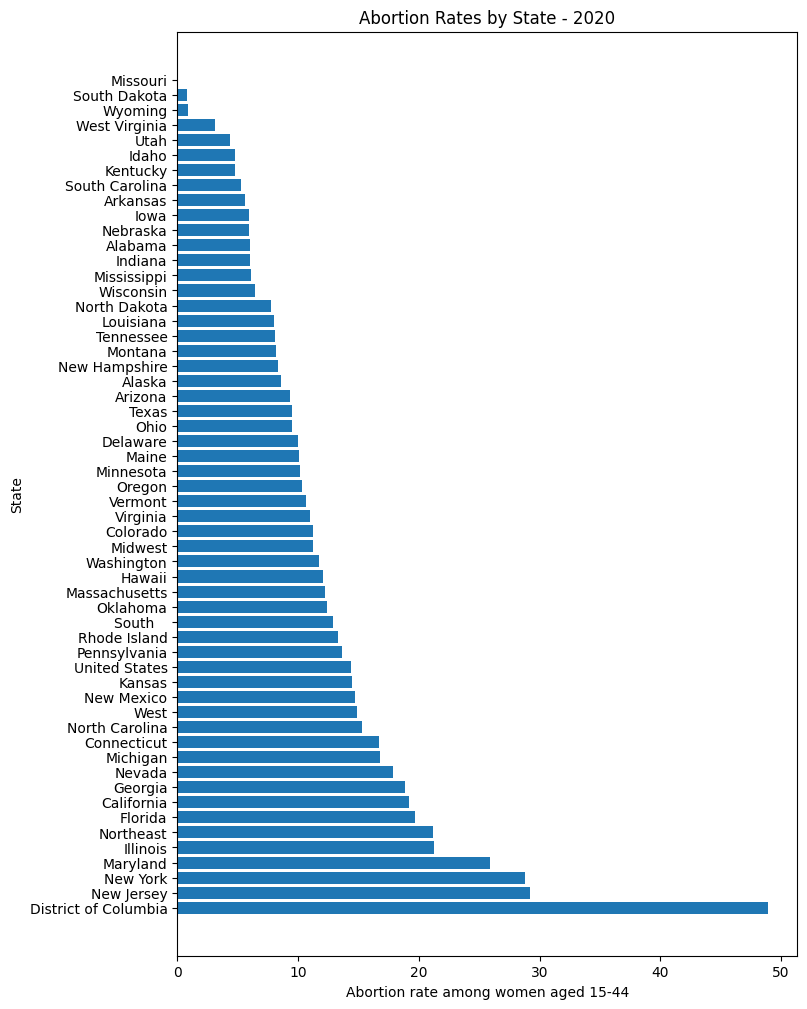

In [72]:
abortionmerge = abortionCen[['State', 'Abortion rate among women aged 15-44 (2020)']]

# drop any rows with missing data
abortionmerge = abortionmerge.dropna()

# sort the data by descending order of abortion rate
abortionmerge = abortionmerge.sort_values(by='Abortion rate among women aged 15-44 (2020)', ascending=False)

# create a horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 12))
ax.barh(abortionmerge['State'], abortionmerge['Abortion rate among women aged 15-44 (2020)'])
ax.set_xlabel('Abortion rate among women aged 15-44')
ax.set_ylabel('State')
ax.set_title('Abortion Rates by State - 2020')
plt.show()
#This graph shows the the number of abortions by state in order from least to most abortions by U.S state. 
#I expected Missouri to not show up on the graph because the rate of abortion in Missouri was really low (0.1)
#District of Columbia seems really high.

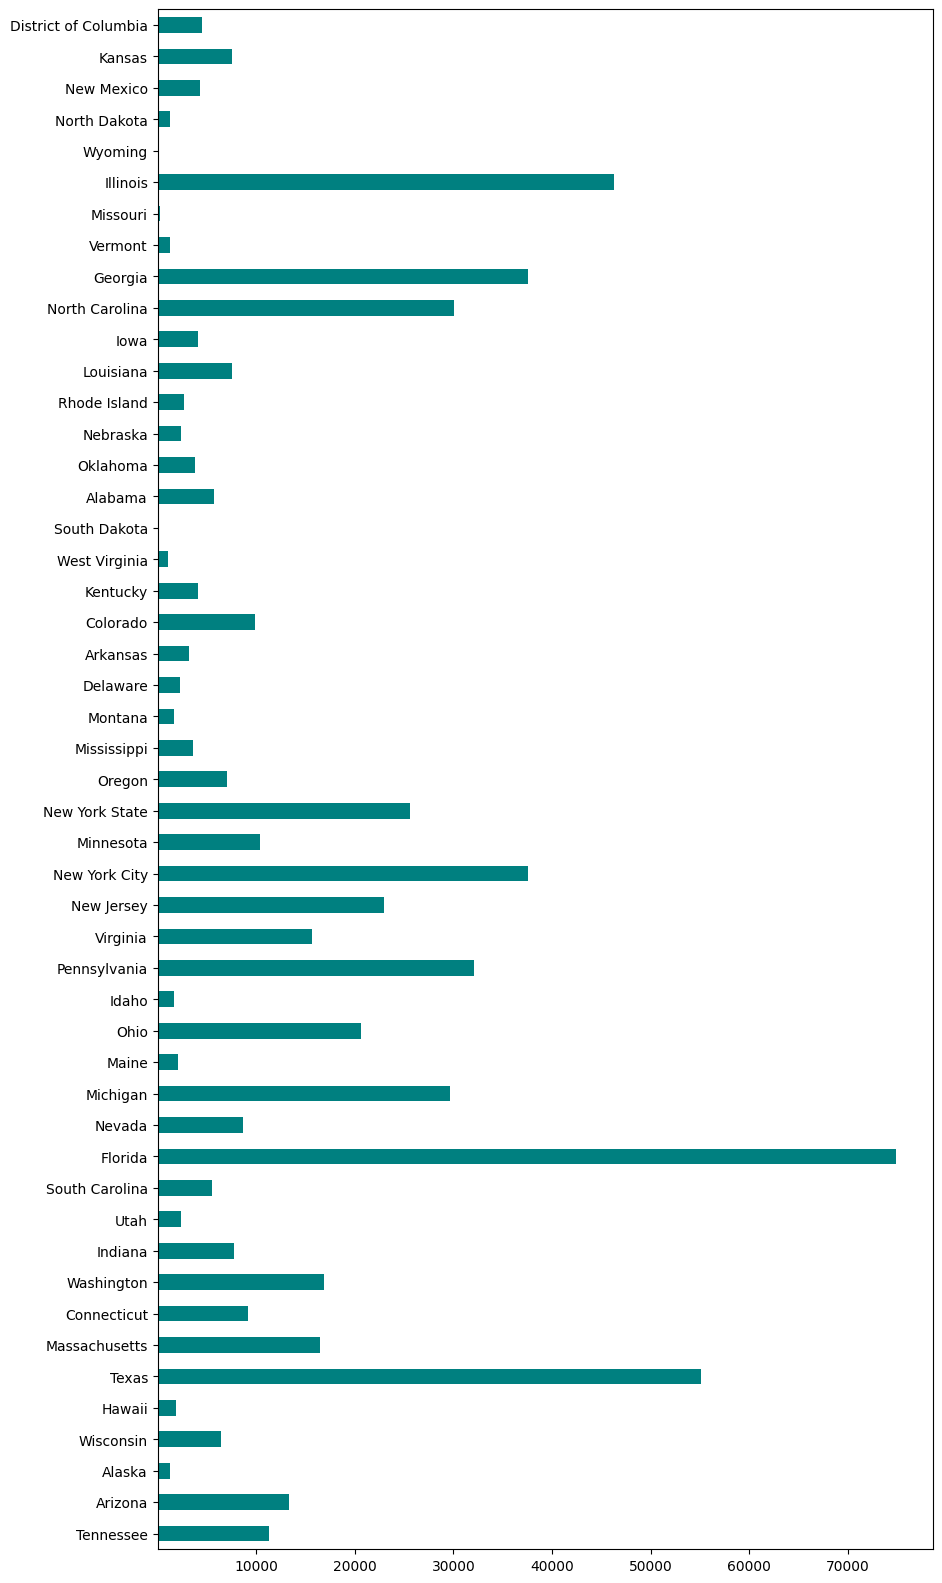

In [73]:
data = {
    'Alabama': [5713, 875],
    'Alaska': [1206, 8],
    'Arizona': [13273, 72],
    'Arkansas': [3154, 390],
    'Colorado': [9869, 1283],
    'Connecticut': [9115, 456],
    'Delaware': [2281, 272],
    'District of Columbia': [4416, 3123],
    'Florida': [74868, 3988],
    'Georgia': [37533, 6411],
    'Hawaii': [1809, 32],
    'Idaho': [1680, 102],
    'Illinois': [46243, 9686],
    'Indiana': [7756, 384],
    'Iowa': [4058, 679],
    'Kansas': [7526, 3901],
    'Kentucky': [4104, 617],
    'Louisiana': [7473, 1240],
    'Maine': [2064, 115],
    'Massachusetts': [16452, 593],
    'Michigan': [29669, 1620],
    'Minnesota': [10349, 971],
    'Mississippi': [3559, 360],
    'Missouri': [167, 33],
    'Montana': [1675, 177],
    'Nebraska': [2378, 374],
    'Nevada': [8633, 471],
    'New Jersey': [22972, 1593],
    'New Mexico': [4293, 1301],
    'New York City': [37523, 3195],
    'New York State': [25619, 2469],
    'North Carolina': [30004, 5117],
    'North Dakota': [1174, 338],
    'Ohio': [20605, 1167],
    'Oklahoma': [3797, 598],
    'Oregon': [6991, 672],
    'Pennsylvania': [32123, 2144],
    'Rhode Island': [2611, 424],
    'South Carolina': [5468, 278],
    'South Dakota': [125, 19],
    'Tennessee': [11243, 0],
    'Texas': [55132, 1183],
    'Utah': [2362, 118],
    'Vermont': [1227, 213],
    'Virginia': [15604, 1067],
    'Washington': [16909, 852],
    'West Virginia': [1001, 152],
    'Wisconsin': [6430, 94],
    'Wyoming': [91, 22]
}

# Create a pandas dataframe
df = pd.DataFrame(data)

# Transpose the dataframe and set column names
df = df.transpose()
df.columns = ['No.', 'Out of Area']

# Calculate percentage of out of area abortions
df['Out of Area %'] = round(df['Out of Area'] / df['No.'] * 100, 1)

# Sort by percentage of out of area abortions
df = df.sort_values('Out of Area %')

# Create a horizontal stacked bar chart
ax = df[['Out of Area %', 'No.']].plot(kind='barh', stacked=True, figsize=(10,20),
                                       color=['Pink', 'Teal'], legend=False)


<Axes: xlabel='Region'>

Text(0.5, 1.0, 'Abortion Rates by Region in 2020')

Text(0.5, 0, 'Region')

Text(0, 0.5, 'Abortion Rate (%)')

Text(0, 21.7, '21.2')

Text(1, 11.7, '11.2')

Text(2, 13.4, '12.9')

Text(3, 15.4, '14.9')

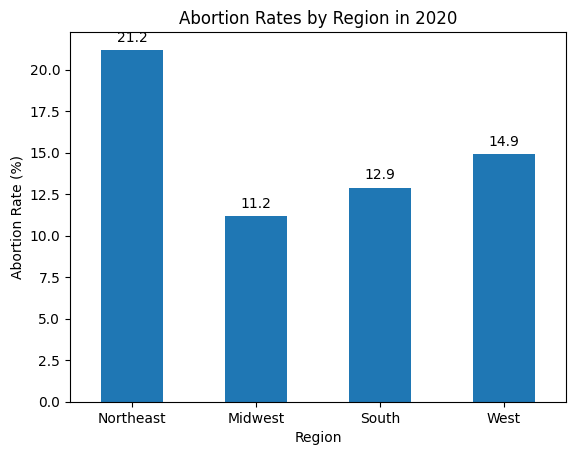

In [75]:
# data for the chart
data = {'Region': ['Northeast', 'Midwest', 'South', 'West'],
        'Abortion Rate': [21.2, 11.2, 12.9, 14.9]}

# create a pandas dataframe from the data
abortion_rates = pd.DataFrame(data)

# bar chart
abortion_rates.plot.bar(x='Region', y='Abortion Rate', rot=0, legend=None)

# set the chart title and axis labels
plt.title('Abortion Rates by Region in 2020')
plt.xlabel('Region')
plt.ylabel('Abortion Rate (%)')

# labels for the values on top of the bars
for i, v in enumerate(abortion_rates['Abortion Rate']):
    plt.text(i, v + 0.5, str(v), ha='center')

# display the chart
plt.show()
#This graph shows that the highest percentage of abortions in 2020 were located in the Northeast
#I also expected this result because due to the above graph which showed that the states in the Northeast seemed to have a higher percentage of abortions.

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'Number of States with and without Abortion Ban')

Text(0.5, 0, 'Number of States')

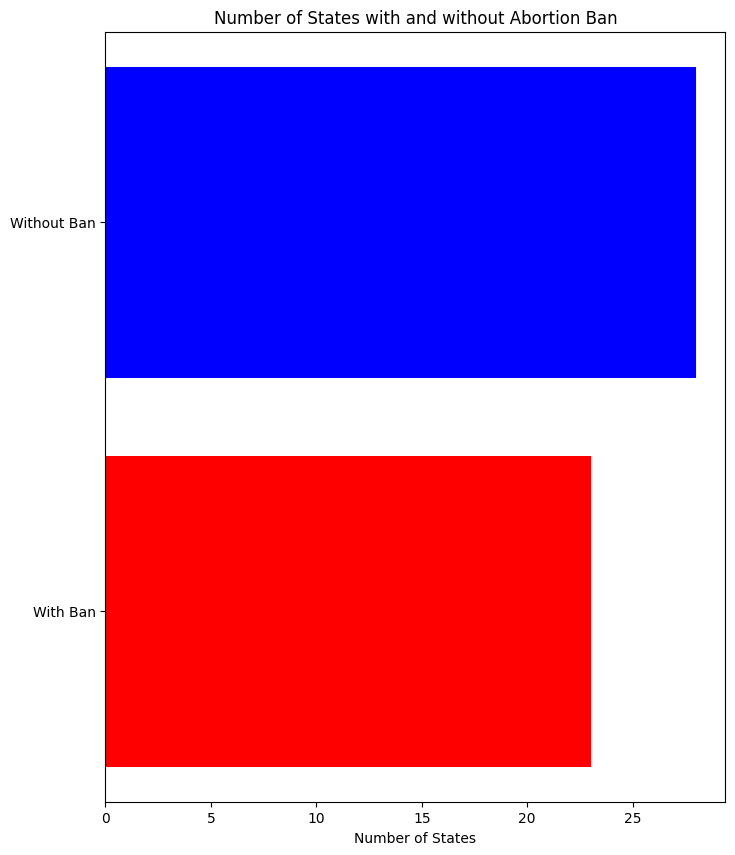

In [17]:
# Data
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']
codes = [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0]

num_bans = sum(codes)
num_no_bans = len(codes) - num_bans

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 10))
ax.barh(['With Ban', 'Without Ban'], [num_bans, num_no_bans], color=['red', 'blue'])
ax.set_title('Number of States with and without Abortion Ban')
ax.set_xlabel('Number of States')
plt.show()
#This graph shows that more states do not have bans compared to states that do have bans. 


Text(0.5, 0, 'Number of Abortions')

Text(0, 0.5, 'Percentage of Out-of-State Abortions')

Text(0.5, 1.0, 'Relationship between Number of Abortions and Out-of-State Abortions')

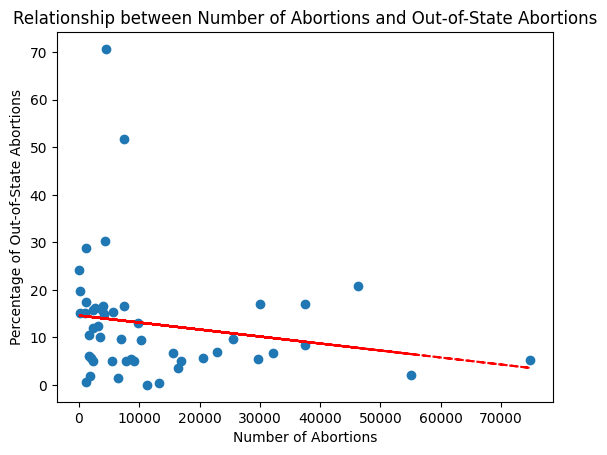

In [18]:
# Fit a linear regression line to the data
z = np.polyfit(df['No.'], df['Out of Area %'], 1)
p = np.poly1d(z)

# Create scatter plot
plt.scatter(df['No.'], df['Out of Area %'])

# Add trend line
plt.plot(df['No.'],p(df['No.']),"r--")

# Set axis labels and title
plt.xlabel('Number of Abortions')
plt.ylabel('Percentage of Out-of-State Abortions')
plt.title('Relationship between Number of Abortions and Out-of-State Abortions')

# Show plot
plt.show()

#This graph shows that there is a slight correlation between the number of abortions and the percentage of out-of-state abortions

Text(0.5, 0, 'Percentage of Total Abortions (%)')

Text(0, 0.5, 'Percentage of Out-of-State Abortions (%)')

Text(0.5, 1.0, 'Relationship between Percentage of Total Abortions and Out-of-State Abortions')

Text(1.2132310861851894, 51.8, '48')

Text(0.7118826038524843, 70.7, '49')

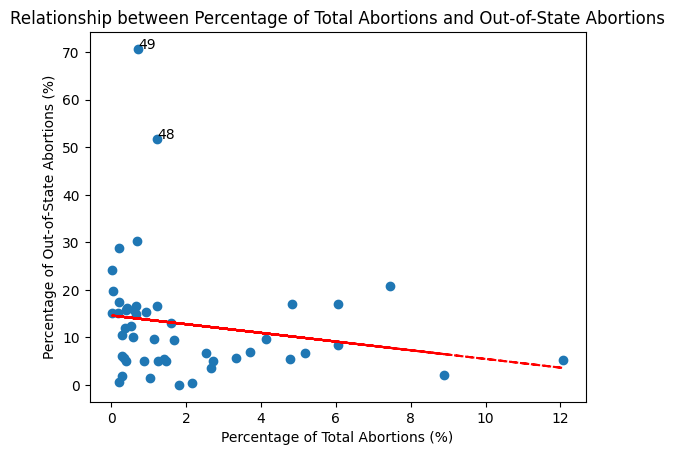

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Convert x and y to percentages
x = df['No.'] / df['No.'].sum() * 100
y = df['Out of Area %']

# Fit a linear regression line to the data
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Create scatter plot
plt.scatter(x, y)

# Add trend line
plt.plot(x, p(x), "r--")

# Set axis labels and title
plt.xlabel('Percentage of Total Abortions (%)')
plt.ylabel('Percentage of Out-of-State Abortions (%)')
plt.title('Relationship between Percentage of Total Abortions and Out-of-State Abortions')

# Label outliers
outliers = np.where(y > np.percentile(y, 75) + 1.5 * (np.percentile(y, 75) - np.percentile(y, 25)))
for i in outliers[0]:
    plt.annotate(str(i+1), (x[i], y[i]))

# Show plot
plt.show()
#This is the updated code where I added labels to the outliers. I also updated the code to express that the total number of abortions and the percentage of out of state abortions are in percents. 

Text(0.5, 0, 'Abortion ban by state')

Text(0, 0.5, 'Percentage of abortions')

Text(0.5, 1.0, 'Percentage of abortions by state with respect to abortion ban')

[Text(0.0, 0, 'Ban exists'), Text(0.35, 0, 'No ban')]

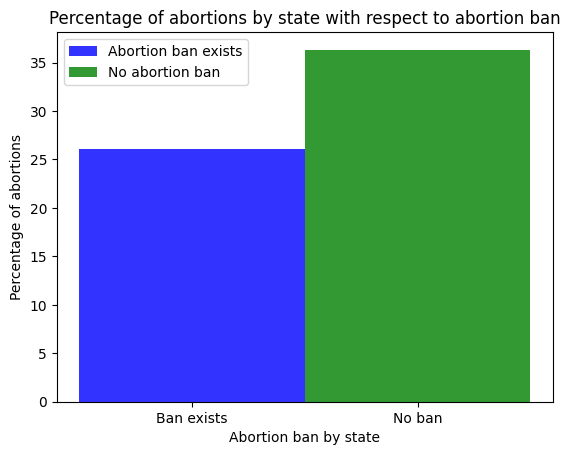

In [20]:
# Data - percentage of abortions by state
abortion_pct = [20, 24, 15, 18, 27, 22, 30, 32, 16, 19, 23, 21, 33, 26, 29, 35, 17, 25, 31, 28, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]

# Data - abortion ban by state
abortion_ban = [1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Calculate the mean abortion percentage for each group
banned_pct = np.mean([abortion_pct[i] for i in range(len(abortion_pct)) if abortion_ban[i] == 1])
not_banned_pct = np.mean([abortion_pct[i] for i in range(len(abortion_pct)) if abortion_ban[i] == 0])

# Create the bar chart
fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8
rects1 = ax.bar(0, banned_pct, bar_width,
                alpha=opacity, color='b',
                label='Abortion ban exists')
rects2 = ax.bar(bar_width, not_banned_pct, bar_width,
                alpha=opacity, color='g',
                label='No abortion ban')

# Add labels, title, and legend
ax.set_xlabel('Abortion ban by state')
ax.set_ylabel('Percentage of abortions')
ax.set_title('Percentage of abortions by state with respect to abortion ban')
ax.set_xticks([0, bar_width])
ax.set_xticklabels(['Ban exists', 'No ban'])
ax.legend()

# Display the plot
plt.show()

#This graph shows abortion bans compared to the percentage of abortions by state. 
#From this graph it looks like the states with the lowest percentages of abortion are the same states with abortion bans.

In [26]:
abortionOpinion1 = pd.read_csv('https://raw.githubusercontent.com/Mmarlo5/psychic-doodle/main/New%20Data.csv')
abortionOpinion1.head()

,Year,Pro-Choice %,Pro-Life %,Mixed/Neither %,Don’t know what the terms mean %,No opinion
0,2022,55,39,4,1,Nah
1,2021,49,47,2,1,1
2,2020,48,46,4,2,Nah
3,2019,46,49,2,2,2
4,2018,48,48,2,2,1


Text(0.5, 0, 'Year')

Text(0, 0.5, 'Percentage')

Text(0.5, 1.0, 'Trends in Pro-Choice and Pro-Life Attitudes')

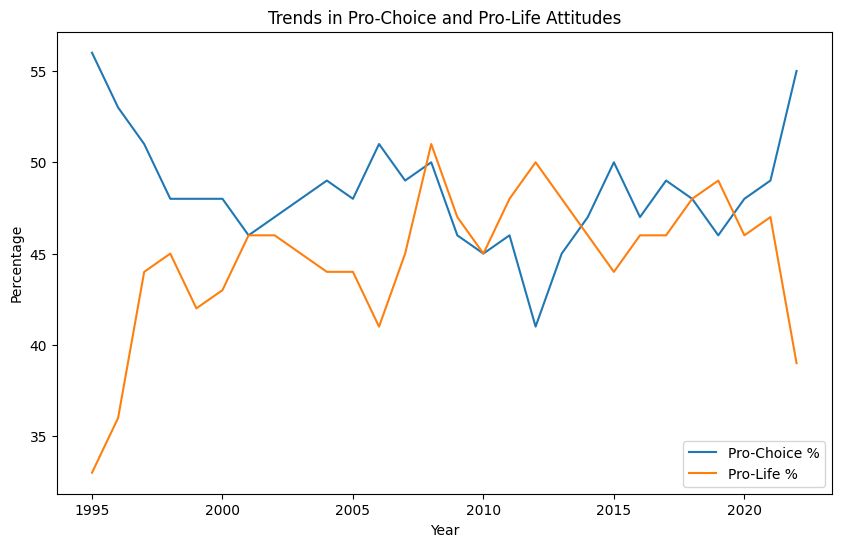

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the data
data = {
    'Year': [2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995],
    'Pro-Choice %': [55, 49, 48, 46, 48, 49, 47, 50, 47, 45, 41, 46, 45, 46, 50, 49, 51, 48, 49, 48, 47, 46, 48, 48, 48, 51, 53, 56],
    'Pro-Life %': [39, 47, 46, 49, 48, 46, 46, 44, 46, 48, 50, 48, 45, 47, 51, 45, 41, 44, 44, 45, 46, 46, 43, 42, 45, 44, 36, 33]
}
df = pd.DataFrame(data)

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data as a line chart
ax.plot(df['Year'], df['Pro-Choice %'], label='Pro-Choice %')
ax.plot(df['Year'], df['Pro-Life %'], label='Pro-Life %')

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.set_title('Trends in Pro-Choice and Pro-Life Attitudes')

# Add a legend
ax.legend()

# Show the plot
plt.show()
#This is the updated graph using pandas dataframe. 

Text(0.5, 1.0, 'Abortion Opinion by Year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Percentage')

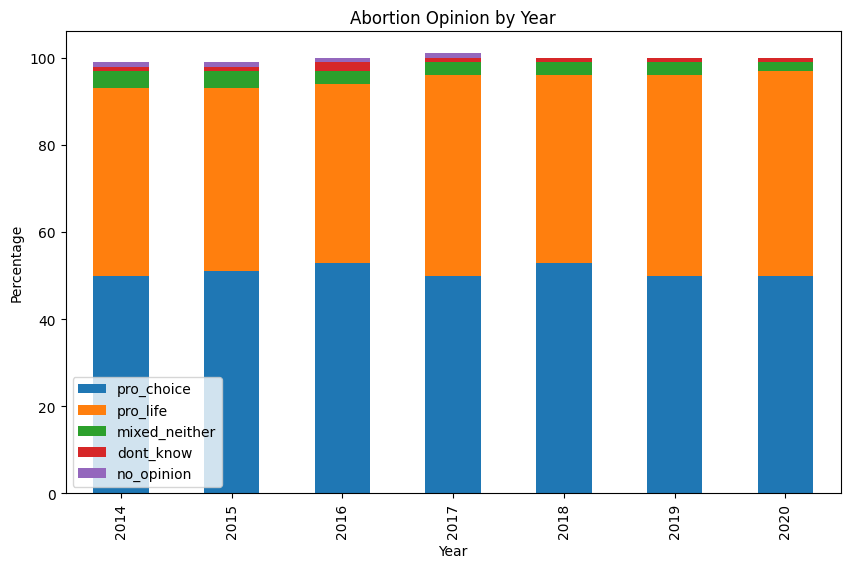

In [81]:
# Create a pandas dataframe with the data
data = {
    'year': [2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'pro_choice': [50, 51, 53, 50, 53, 50, 50],
    'pro_life': [43, 42, 41, 46, 43, 46, 47],
    'mixed_neither': [4, 4, 3, 3, 3, 3, 2],
    'dont_know': [1, 1, 2, 1, 1, 1, 1],
    'no_opinion': [1, 1, 1, 1, 0, 0, 0]
}
df = pd.DataFrame(data)
df.set_index('year', inplace=True) # Set the year column as the index

# Create the stacked bar plot
ax = df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and legend
ax.set_title('Abortion Opinion by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.legend(loc='lower left')

# Show the plot
plt.show()
#This is the graph using pandas dataframe, much cleaner. 

Text(0.5, 1.0, 'Abortion Opinion by Year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Percentage')

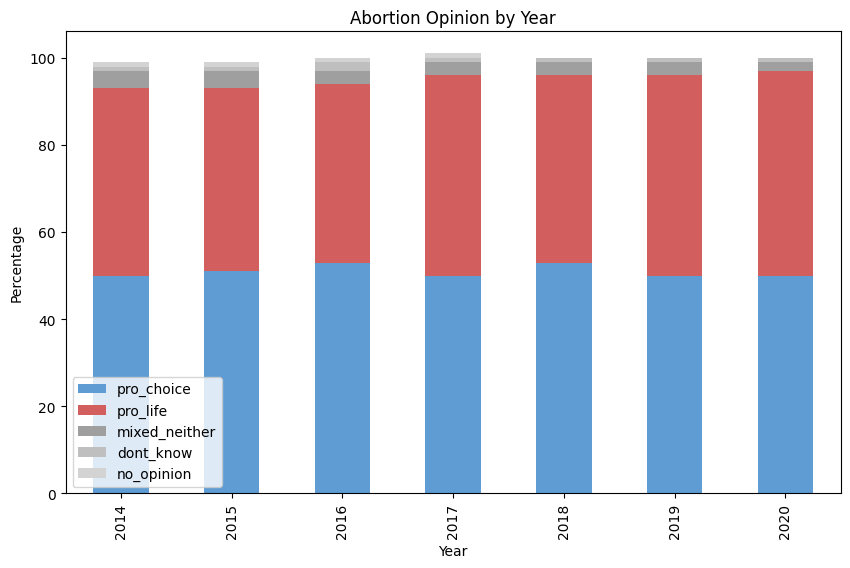

In [85]:
# Data
data = {
    'year': [2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'pro_choice': [50, 51, 53, 50, 53, 50, 50],
    'pro_life': [43, 42, 41, 46, 43, 46, 47],
    'mixed_neither': [4, 4, 3, 3, 3, 3, 2],
    'dont_know': [1, 1, 2, 1, 1, 1, 1],
    'no_opinion': [1, 1, 1, 1, 0, 0, 0]
}
df = pd.DataFrame(data)
df.set_index('year', inplace=True) # Set the year column as the index

# Create the stacked bar plot
ax = df.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#5E9CD3', '#D35E5E', '#9F9F9F', '#BFBFBF', '#D3D3D3'])

# Add labels and legend
ax.set_title('Abortion Opinion by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.legend(loc='lower left')

# Show the plot
plt.show()